<a href="https://colab.research.google.com/github/Canas-AlyssaVivien/BPNN/blob/main/Anime_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [3]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

df.dropna(subset=['genre'], inplace=True)
df.reset_index(drop=True, inplace=True)

df['genre'] = df['genre'].str.strip()

mlb = MultiLabelBinarizer()
genres = mlb.fit_transform(df['genre'].str.split(', '))
genre_matrix = pd.DataFrame(genres, columns=mlb.classes_, index=df.index)

df = pd.concat([df, genre_matrix], axis=1)

last_genre_column_index = 49
df = df.iloc[:, :last_genre_column_index + 1]

df.head()

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,0


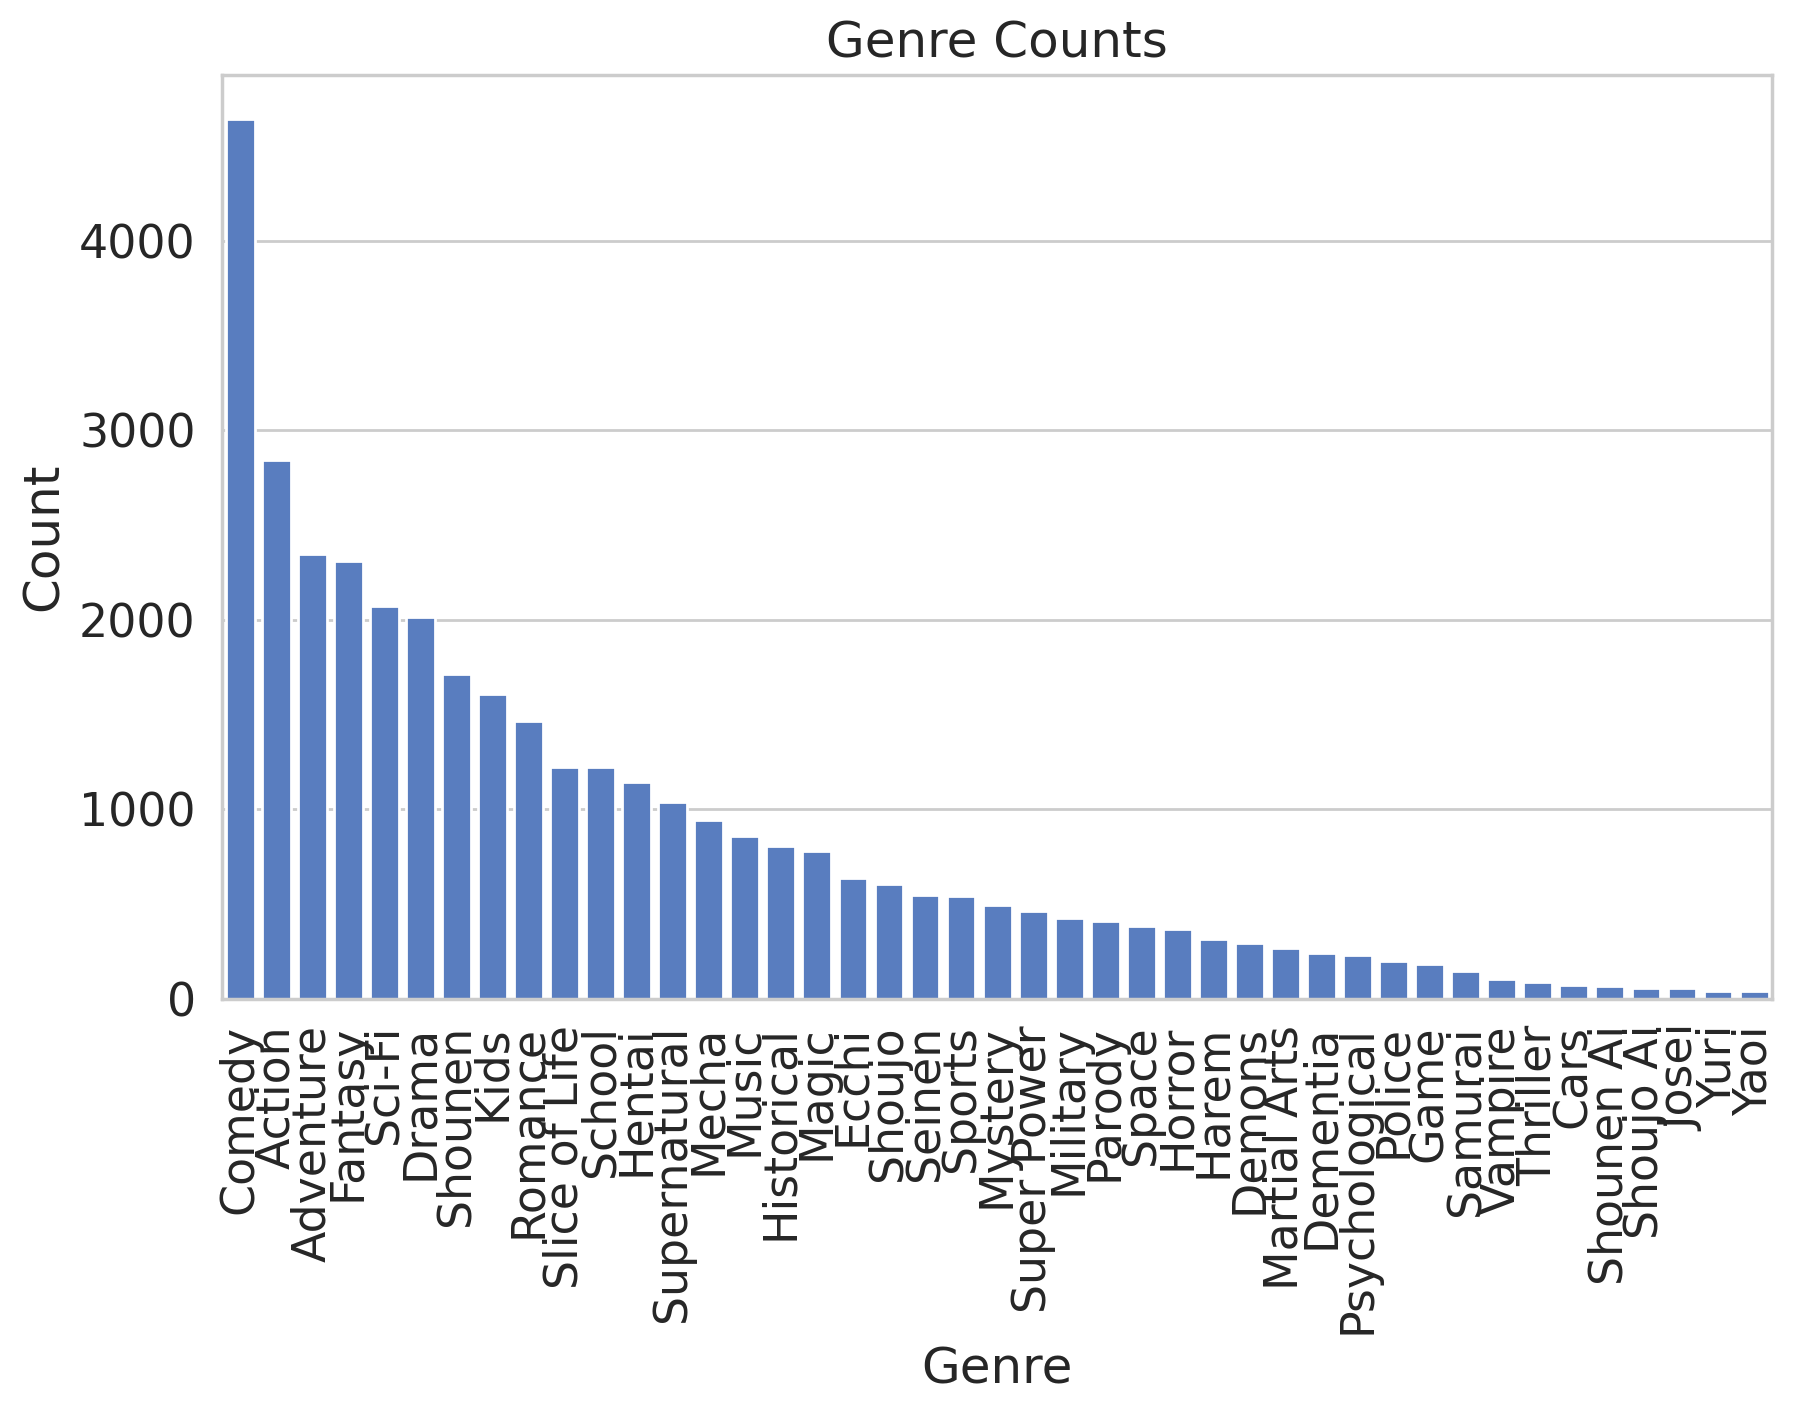

In [5]:
genre_counts = df.iloc[:, 7:].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'])
y = df.drop(columns=['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam

model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(units=128, activation='relu'),
    Dropout(0.5),
    Dense(units=y_train.shape[1], activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)
import pickle
with open('anime_recommendation_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Epoch 1/50
138/138 [==============================] - 2s 12ms/step - loss: 0.0613 - accuracy: 0.5681 - val_loss: 0.0204 - val_accuracy: 0.6670
Epoch 2/50
138/138 [==============================] - 1s 6ms/step - loss: 0.0606 - accuracy: 0.5629 - val_loss: 0.0201 - val_accuracy: 0.7140
Epoch 3/50
138/138 [==============================] - 1s 6ms/step - loss: 0.0600 - accuracy: 0.5742 - val_loss: 0.0197 - val_accuracy: 0.7068
Epoch 4/50
138/138 [==============================] - 1s 6ms/step - loss: 0.0605 - accuracy: 0.5744 - val_loss: 0.0198 - val_accuracy: 0.6885
Epoch 5/50
138/138 [==============================] - 1s 7ms/step - loss: 0.0596 - accuracy: 0.5786 - val_loss: 0.0195 - val_accuracy: 0.6874
Epoch 6/50
138/138 [==============================] - 1s 8ms/step - loss: 0.0598 - accuracy: 0.5792 - val_loss: 0.0193 - val_accuracy: 0.7017
Epoch 7/50
138/138 [==============================] - 1s 7ms/step - loss: 0.0585 - accuracy: 0.5713 - val_loss: 0.0189 - val_accuracy: 0.6874
Epoch

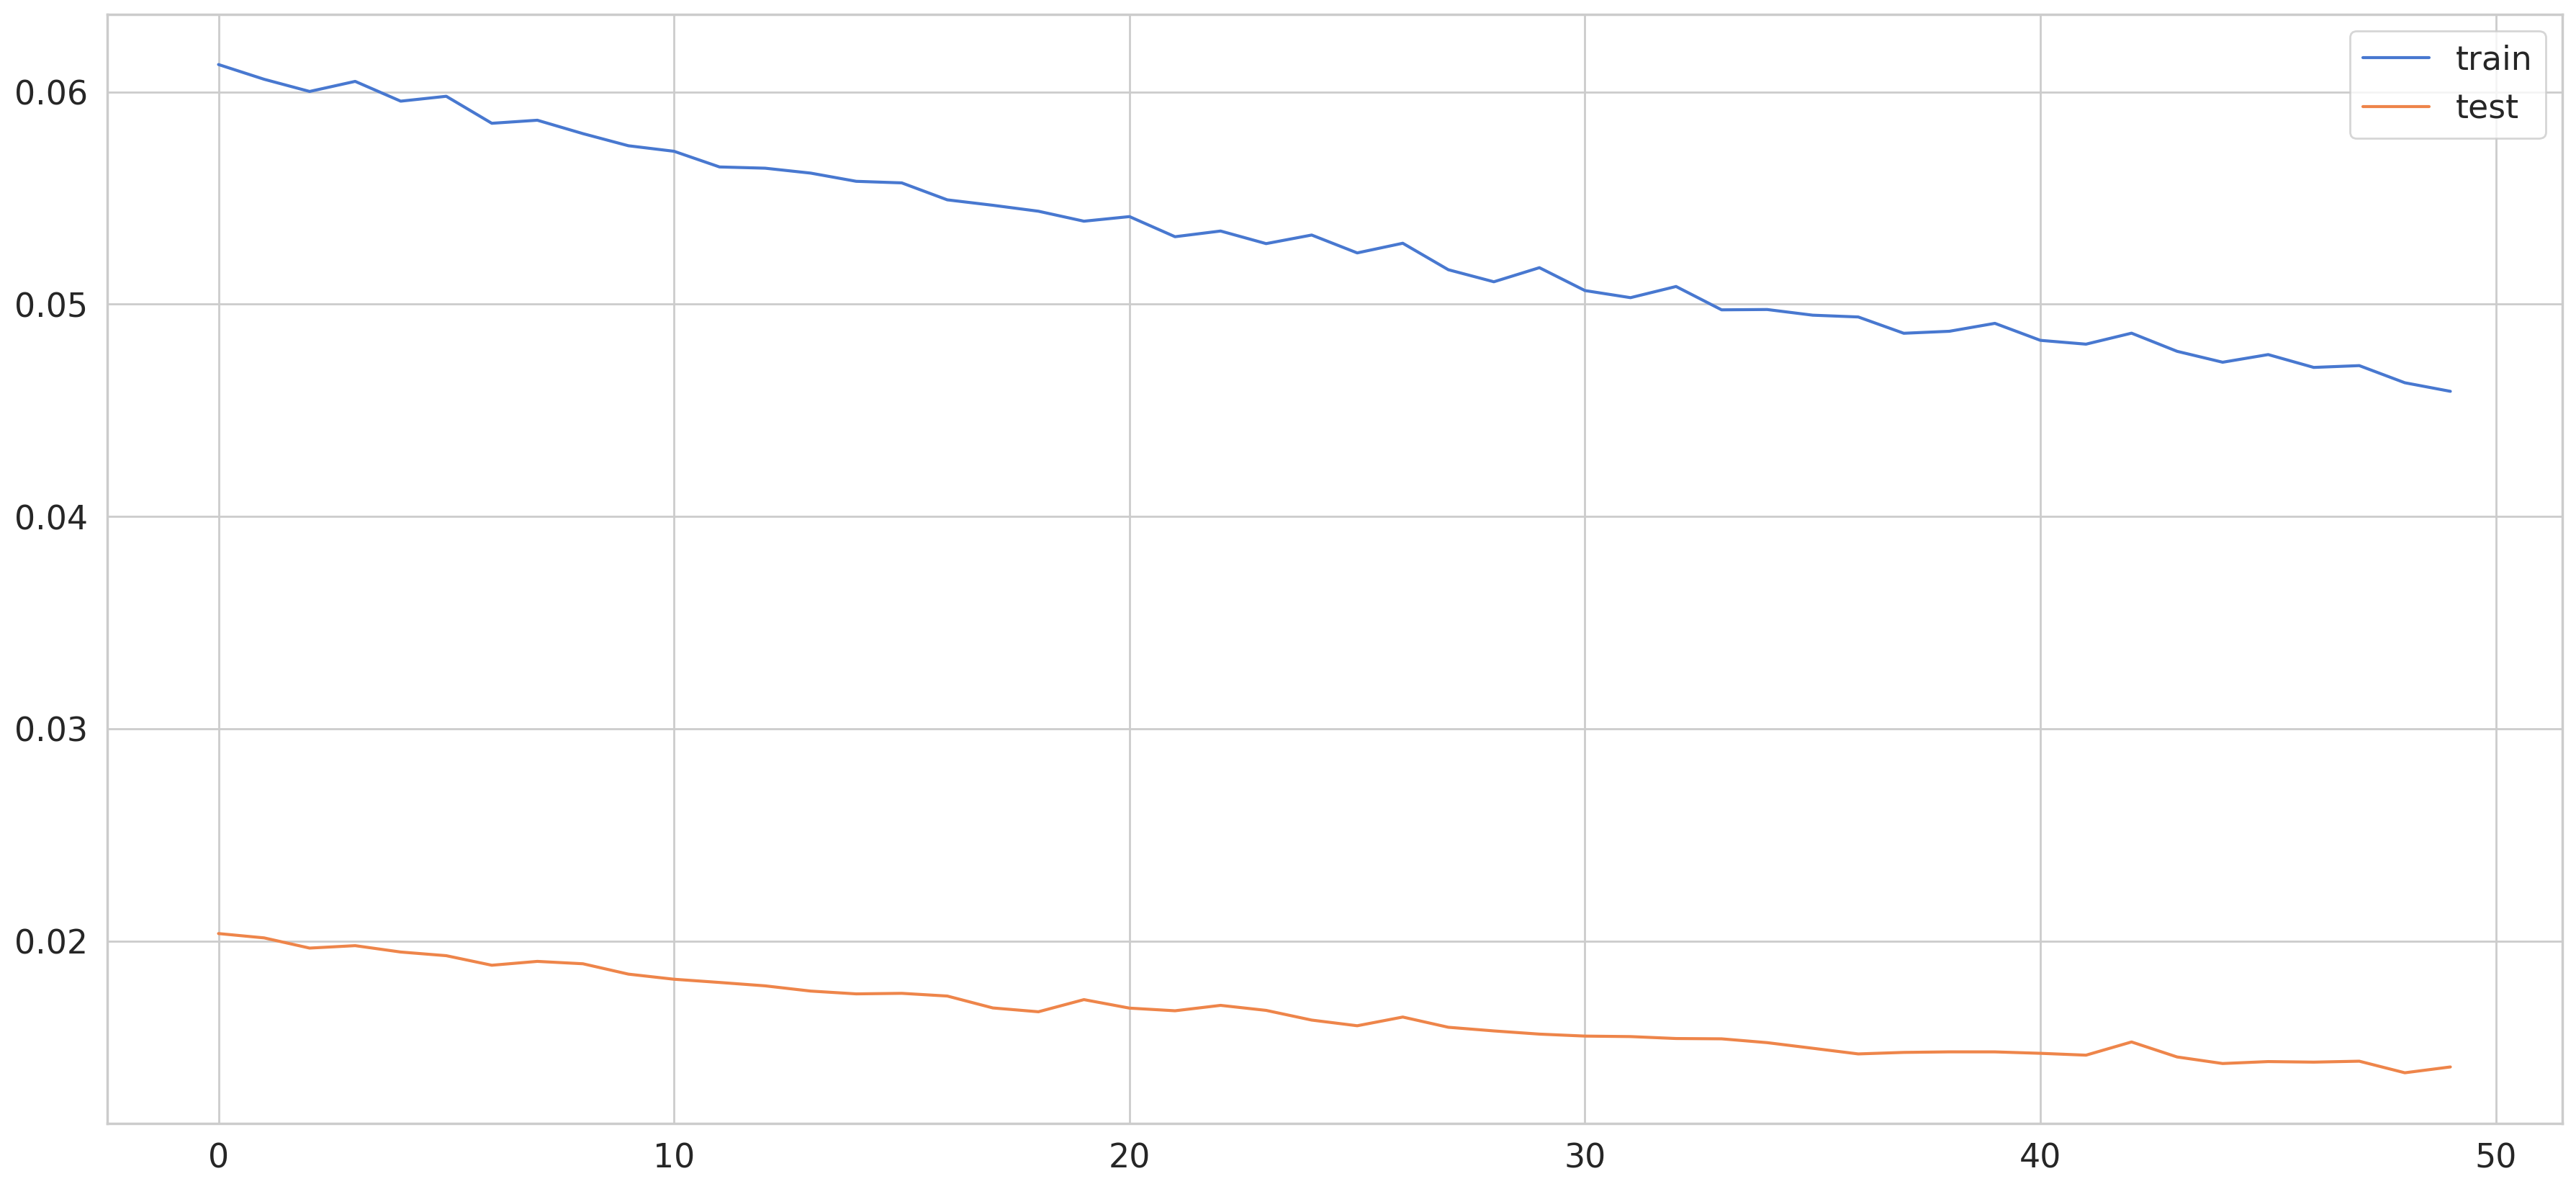

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [11]:
model.evaluate(X_test, y_test)

77/77 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.6923


[0.013727573677897453, 0.6922762393951416]

In [12]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary, target_names=y.columns))

77/77 [==============================] - 0s 1ms/step
               precision    recall  f1-score   support

       Action       0.98      1.00      0.99       564
    Adventure       1.00      0.99      0.99       469
         Cars       1.00      1.00      1.00        11
       Comedy       1.00      0.99      1.00       944
     Dementia       0.97      0.93      0.95        41
       Demons       0.90      0.68      0.77        65
        Drama       0.98      1.00      0.99       436
        Ecchi       1.00      0.99      0.99       137
      Fantasy       0.99      1.00      0.99       501
         Game       1.00      0.89      0.94        35
        Harem       0.98      0.80      0.88        60
       Hentai       1.00      0.98      0.99       218
   Historical       0.99      0.93      0.96       156
       Horror       0.98      0.82      0.90        68
        Josei       1.00      0.88      0.94        17
         Kids       1.00      0.99      1.00       310
        Mag